# BOAT LISTING VIEWS PREDICTION

## EXECUTIVE SUMMARY



- The goal of the analysis is to create a model that can predict number of views and to determine which features that can be removed based on the importance.
- Some data cleanings are required before entering the model creation which include splitting columns, handling missing data, handling outliers, and removing unnecessary data.
- The model is a supervised machine learning regression model. The best model chosen is Random Forest Regressor with RMSE of 66.7. This model prediction error is 50% than the actual value.
- The most important features are location and price while the least important features are type, material, and fuel. We can consider to remove the least important features from the survey.

## 1. Background

- Our company, Boatee, is seeking ways to boost our traffic. After some years experience, we have learned that there are several boats that are not high in demand. Product Manager wants to prevent listing boats that have less view in order to boost website traffic. 

- The goal of this analysis is to create a model that can predict the number of listing view based on characteristics of the boat so that we can reject typical types of boat in the future. The prediction should not deviate >50% than the actual value. Furthermore, we also want to see the main features that contributes to the number of view in order to simplify the survey.

- The analysis will be comprised of exploratory data analysis, modelling, and conclusion.

- The raw data is sourced from our internal company's data.


Data's columns:

|Columns|Details|
| --- | --- |
|Price|Boat price listed in different currencies on the website|
|Boat Type|Type of the boat|
|Manufacturer| Manufacturer of the boat|
|Type|Condition of the boat and engine type/fuel used|
|Year Built|Year of the boat built|
|Length|Length in meter of the boat|
|Width|Width in meter of the boat|
|Material|Material of the boat|
|Location|Location of the boat is listed|
|Number of views last 7 days|Number of views of the list last 7 days|

In [66]:
# Importing the package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error as MSE
import xgboost as xgb
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

## 2. Exploratory Data Analysis & Data Cleaning

### 2.1 Exploratory Data Analysis

In [67]:
# Importing the data
df = pd.read_csv(r"C:\Users\garyr\OneDrive\Employment\Github\Boat Listing\boat_data.csv")

In [68]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (9888, 11)


In [69]:
#Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9888 non-null   int64  
 1   Price                        9888 non-null   object 
 2   Boat Type                    9888 non-null   object 
 3   Manufacturer                 8550 non-null   object 
 4   Type                         9882 non-null   object 
 5   Year Built                   9888 non-null   int64  
 6   Length                       9879 non-null   float64
 7   Width                        9832 non-null   float64
 8   Material                     8139 non-null   object 
 9   Location                     9852 non-null   object 
 10  Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 849.9+ KB


In [70]:
#Checking the first 20 columns of the data.
df.head(20)

,Unnamed: 0,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
6,6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474
7,7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134
8,8,EUR 3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45
9,9,EUR 3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180


In [71]:
#Checking the summary statistic of the raw data
df.describe()

,Unnamed: 0,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9888.000000,9879.000000,9832.000000,9888.000000
mean,4943.500000,1893.192860,11.570017,3.520124,149.160801
std,2854.564065,460.201582,6.002820,1.220534,151.819752
min,0.000000,0.000000,1.040000,0.010000,13.000000
25%,2471.750000,1996.000000,7.470000,2.540000,70.000000
50%,4943.500000,2007.000000,10.280000,3.330000,108.000000
75%,7415.250000,2017.000000,13.930000,4.250000,172.000000
max,9887.000000,2021.000000,100.000000,25.160000,3263.000000


In [72]:
#Checking the number of unique values in each column

string_col = df.select_dtypes(include="object").columns
dict = {}
for i in list(df[string_col]):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Price,3182
Boat Type,126
Manufacturer,910
Type,24
Material,11
Location,2995


In [73]:
#Checking the unique value for "reasonable" categorical columns
df['Boat Type'].unique()

array(['Motor Yacht', 'Center console boat', 'Sport Boat', 'Fishing Boat',
       'Catamaran', 'Pontoon Boat', 'Runabout', 'Deck Boat', 'Pilothouse',
       'Cabin Boat', 'Working Boat', 'Classic', 'Bowrider',
       'Sport Boat,Working Boat', 'Cabin Boat,Classic',
       'Deck Boat,Pilothouse,Sport Boat', 'Trawler', 'Launch',
       'Cabin Boat,Trawler', 'Bowrider,Classic', 'Motor Yacht,Sport Boat',
       'Classic,Runabout,Sport Boat', 'Cabin Boat,Motor Yacht',
       'Classic,Launch', 'Cabin Boat,Sport Boat', 'Flybridge',
       'Water ski', 'Hardtop', 'Classic,Runabout', 'Offshore Boat',
       'Cabin Boat,Sport Boat,Wakeboard/Wakesurf', 'Classic,Pontoon Boat',
       'Classic,Motor Yacht', 'Motor Yacht,Sport Boat,Trawler',
       'Wakeboard/Wakesurf', 'Passenger boat',
       'Classic,Sport Boat,Water ski', 'Classic,Sport Boat', 'House Boat',
       'Classic,Motorsailer', 'Sport Boat,Wakeboard/Wakesurf',
       'Pilothouse,Sport Boat', 'House Boat,Motor Yacht',
       'Cabin Boat,

In [74]:
df['Material'].unique()

array([nan, 'Thermoplastic', 'Aluminium', 'GRP', 'PVC', 'Plastic', 'Wood',
       'Steel', 'Hypalon', 'Carbon Fiber', 'Reinforced concrete',
       'Rubber'], dtype=object)

In [75]:
df['Type'].unique()

array(['new boat from stock', 'Used boat,Unleaded', 'Used boat',
       'Used boat,Electric', 'new boat from stock,Unleaded',
       'Used boat,Diesel', 'new boat on order', 'Unleaded',
       'new boat on order,Unleaded', 'new boat from stock,Gas', 'Diesel',
       'Display Model,Unleaded', 'Display Model', nan, 'Used boat,Gas',
       'new boat from stock,Diesel', 'new boat from stock,Electric',
       'new boat on order,Diesel', 'new boat from stock,Hybrid',
       'Display Model,Diesel', 'Used boat,Hybrid', 'Display Model,Gas',
       'Display Model,Electric', 'Electric', 'Used boat,Propane'],
      dtype=object)

In [76]:
# Checking the missing value
df.isnull().sum()/len(df)*100

Unnamed: 0                      0.000000
Price                           0.000000
Boat Type                       0.000000
Manufacturer                   13.531553
Type                            0.060680
Year Built                      0.000000
Length                          0.091019
Width                           0.566343
Material                       17.688107
Location                        0.364078
Number of views last 7 days     0.000000
dtype: float64

In [77]:
#Checking correlation for numerical columns
df.corr()

,Unnamed: 0,Year Built,Length,Width,Number of views last 7 days
Unnamed: 0,1.000000,-0.043485,-0.217227,-0.237906,0.081065
Year Built,-0.043485,1.000000,0.117290,0.127150,0.024808
Length,-0.217227,0.117290,1.000000,0.873093,-0.135011
Width,-0.237906,0.127150,0.873093,1.000000,-0.157547
Number of views last 7 days,0.081065,0.024808,-0.135011,-0.157547,1.000000


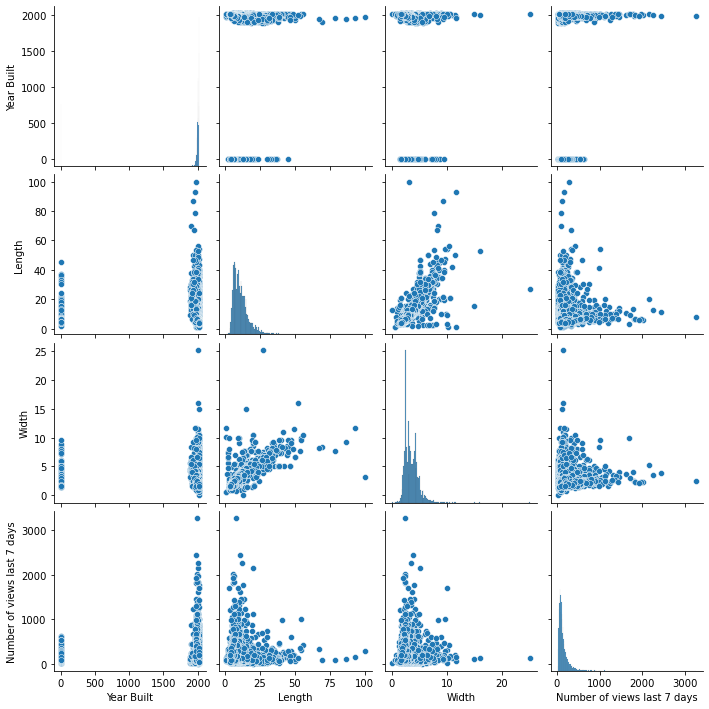

In [78]:
#Exploring numerical columns
sns.pairplot(df[['Year Built','Length','Width','Number of views last 7 days']])
plt.show()

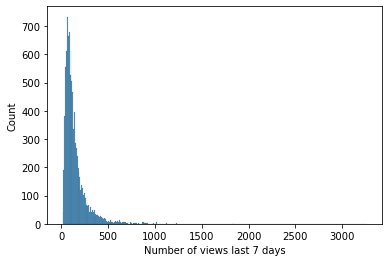

In [79]:
#Checking the distribution of number of views.

sns.histplot(data=df, x='Number of views last 7 days')
plt.show()

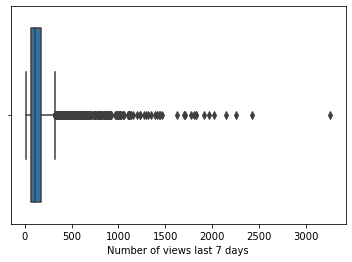

In [80]:
#Checking the distribution of number of views.

sns.boxplot(data=df, x='Number of views last 7 days')
plt.show()

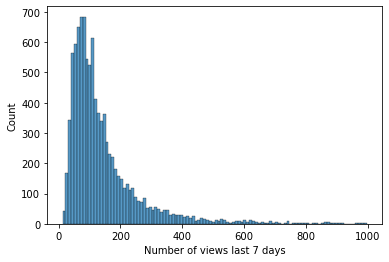

In [81]:
#Trying to zoom in for values below 1000.

smallerdf = df[df['Number of views last 7 days'] < 1000]
sns.histplot(data=smallerdf, x='Number of views last 7 days')
plt.show()

<b> Insights from initial raw data exploration: </b>

General exploration:
- The dataframe contains 10 columns with "Number of views last 7 days" as the dependent variable. The dependent variable name will be changed for efficiency purpose.
- The dependent variable has outliers. Most of the values are between 0-200 views.
- The numerical values are not correlated to each other.

Columns:
- Price column contains currency and price. Technically this should be numerical column. Currency and price should be separated. Currency should be adjusted to the same currency.
- Location column is a combination of country and city. The first word will always be the country. We can get the country name. 
- Type column contains information about the fuel separated by comma consistently. Need to be separated because the fuel may contain nice information as well and because the material column needs to be grouped together.
- "Boat Type" column can be overlapping with each other. The number of types is available up to 3 types.

Missing value:
- There are a lot of missing value from Manufacturer and Material columns. There are minor missing value from Type, length, width, and location value.
- Missing value in Year Built column is considered as 0. This zero value must be eradicated.

Another insight:
- Some of the exploratory data analysis need to be done again after cleaning.

### 2.2 Data Cleaning

#### 2.2.1 Columns Cleaning

##### 2.2.1.1 Dependent Variable

In [82]:
#The dependent variable column name is too long. 
#Simplifying the column name to ease the analysis onwards.
df = df.rename(columns={"Number of views last 7 days": "View"}) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9888 non-null   int64  
 1   Price         9888 non-null   object 
 2   Boat Type     9888 non-null   object 
 3   Manufacturer  8550 non-null   object 
 4   Type          9882 non-null   object 
 5   Year Built    9888 non-null   int64  
 6   Length        9879 non-null   float64
 7   Width         9832 non-null   float64
 8   Material      8139 non-null   object 
 9   Location      9852 non-null   object 
 10  View          9888 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 849.9+ KB


In [83]:
#Based on the exploration, we should remove the outliers.
df[df['View'] > 500].count()

Unnamed: 0      278
Price           278
Boat Type       278
Manufacturer    263
Type            278
Year Built      278
Length          278
Width           278
Material        266
Location        278
View            278
dtype: int64

In [84]:
#The amount of value is small. We may proceed with the outlier removal.
df = df[df['View'] <= 500]
df = df.reset_index(drop=True)

##### 2.2.1.2 Price Column

Price column should be in numerical type.
Currently, its combined into string type because its combined with the currency
Currency should be separated and price should be converted into one type of currency.

In [85]:
#Price column should be in numerical type.
#Currently, its combined into string type because its combined with the currency
#Currency should be separated and price should be converted into one type of currency.

#Separating the currency & price
price = df["Price"].str.split(" ", n = 1, expand = True)
price

,0,1
0,CHF,3337
1,EUR,3490
2,CHF,3770
3,DKK,25900
4,EUR,3399
...,...,...
9605,CHF,4950
9606,EUR,4516
9607,EUR,4499
9608,EUR,4300


In [86]:
#Checking the final outcome of Currency column
df['Currency'] = price.loc(axis=1)[0]
df['Currency']

0       CHF
1       EUR
2       CHF
3       DKK
4       EUR
       ... 
9605    CHF
9606    EUR
9607    EUR
9608    EUR
9609    CHF
Name: Currency, Length: 9610, dtype: object

In [87]:
#Checking the final outcome of Price column
df['Price'] = price.loc(axis=1)[1]
df['Price']

0        3337
1        3490
2        3770
3       25900
4        3399
        ...  
9605     4950
9606     4516
9607     4499
9608     4300
9609     3780
Name: Price, Length: 9610, dtype: object

Since the currency is different, the actual price value might be different as well. 
Its better to convert it into same currency. 

To decide which currency to use, the best way is to convert into majority currency used.

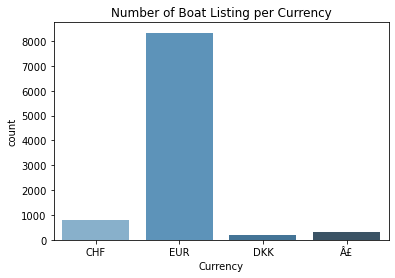

In [88]:
sns.countplot(x='Currency', data=df, palette='Blues_d')
plt.title('Number of Boat Listing per Currency')
plt.show()

#We can see the majority currency used is EUR.

Based on the result above, the majority of used currency is EUR.
So, we need to change CHF, DKK, and â£ to EUR.

Based on currency on 14th May 2022 14:38 GMT+8, 
1 CHF = 0.96 EUR
1 DKK = 0.13 EUR
1 â£ = 1.18 EUR

In [89]:
#Multiplying the price by the respective currency conversion and drop currency column

df['Price'] = df['Price'].astype(float)
df['Price'] = [df['Price'][i]*0.96 if df['Currency'][i] == 'CHF'
              else df['Price'][i]*0.13 if df['Currency'][i] == 'DKK'
              else df['Price'][i] if df['Currency'][i] == 'EUR'
              else df['Price'][i]*1.18 
              for i in range(len(df['Price']))]

df = df.drop(columns='Currency')
df['Price'] = df['Price'].astype(int)
df['Price']

0       3203
1       3490
2       3619
3       3367
4       3399
        ... 
9605    4752
9606    4516
9607    4499
9608    4300
9609    3628
Name: Price, Length: 9610, dtype: int32

Now, the price columns is settled:
- The price and currency already separated
- Price already converted based on currency
- Currency column already deleted
- Price already in float form

##### 2.2.1.3 Location Column

We would like to get the country of the boat.
Currently the location column is combined with the city and address details.
This is unnecessary because there would be too much unique values.
Getting the country is enough.

In [90]:
df['Location'] = df['Location'].str.split("Â»", n = 1, expand = True).loc(axis=1)[0]

In [91]:
df['Location'] = df['Location'].str.strip()
df["Location"]

0       Switzerland
1           Germany
2       Switzerland
3           Denmark
4           Germany
           ...     
9605    Switzerland
9606        Germany
9607        Germany
9608          Italy
9609    Switzerland
Name: Location, Length: 9610, dtype: object

In [92]:
#Checking the Location column
locationcount = df["Location"].value_counts().reset_index()
print(locationcount)

            index  Location
0         Germany      1884
1           Italy      1780
2          France      1224
3     Netherlands      1053
4     Switzerland       940
..            ...       ...
101       Ireland         1
102         Adria         1
103    Seychelles         1
104       Morocco         1
105  Welschenrohr         1

[106 rows x 2 columns]


In [93]:
#We've found out that there are so many countries that only have less than 20 rows.
#This tendency can create a noise. Its better to change them into "Others"

locationcount = locationcount[locationcount['Location'] >= 20]
locationcountlist = list(locationcount['index'])
df.loc[(~df['Location'].isin(locationcountlist)),['Location']] = 'Others'

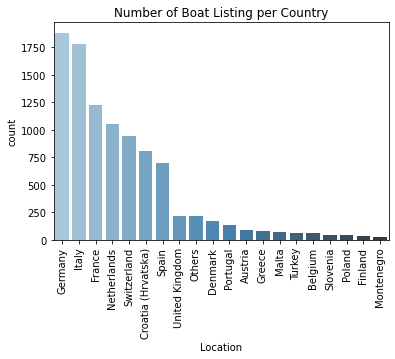

In [94]:
sns.countplot(data=df, x='Location', palette='Blues_d',order = df['Location'].value_counts().index)
plt.xticks(rotation =90)
plt.title('Number of Boat Listing per Country')
plt.show()

We have removed the unnecessary details of the city / regency / address.
We have removed minority countries and only maintained a small list of majority countries.
Location column has been successfully cleaned.

##### 2.2.1.3 Type Column

Type column is a combination of boat condition and engine/fuel type.
Both information should be separated because each one contains specific information.

In [95]:
typeandfuel = df['Type'].str.split(",", n = 1, expand = True)
typeandfuel

,0,1
0,new boat from stock,None
1,new boat from stock,None
2,new boat from stock,None
3,new boat from stock,None
4,new boat from stock,None
...,...,...
9605,Used boat,Unleaded
9606,new boat from stock,None
9607,new boat from stock,Unleaded
9608,new boat from stock,None


In [96]:
df['Type'] = typeandfuel.loc(axis=1)[0]
df['Fuel'] = typeandfuel.loc(axis=1)[1]

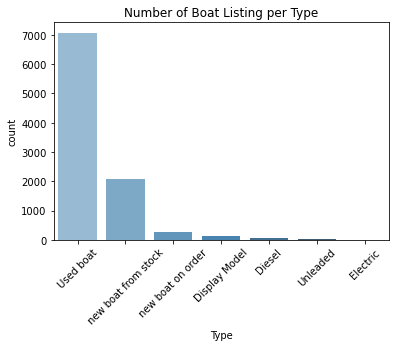

In [97]:
sns.countplot(data=df, x='Type', palette='Blues_d',order = df['Type'].value_counts().index)
plt.xticks(rotation =45)
plt.title('Number of Boat Listing per Type')
plt.show()

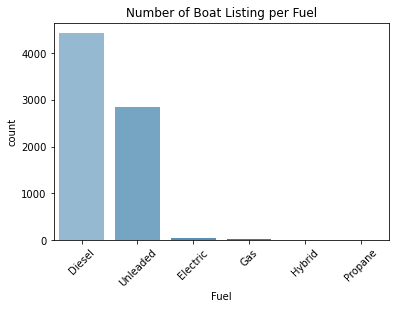

In [98]:
sns.countplot(data=df, x='Fuel', palette='Blues_d',order = df['Fuel'].value_counts().index)
plt.xticks(rotation =45)
plt.title('Number of Boat Listing per Fuel')
plt.show()

In [99]:
#Checking the missing value for fuel.

(df['Fuel'].isna().sum())/len(df['Fuel'])*100

23.631633714880333

We've found out a huge amount of missing value from Fuel.Its already 23% of the whole dataset.
However, it would be unwise to put everything into the mode (Diesel) since we also have Unleaded fuel as second majority of the fuel.
Directly assigning missing value into Diesel may lead to inaccurate data.
Therefore, its better to categorize missing value into "Undefined" fuel.

In [100]:
df['Fuel'].fillna('Undefined', inplace=True)
df['Fuel'].isna().sum()

#We have successfully managed missing value in Fuel column.

0

We have succesfully separated information on boat condition and type of fuel/engine used.
Moreover, we have successfully managed the missing value in Fuel column.

##### 2.2.1.4 Manufacturer

In [101]:
manufacturer = df['Manufacturer'].value_counts().reset_index()
manufacturer

,index,Manufacturer
0,BÃ©nÃ©teau power boats,629
1,Jeanneau power boats,533
2,Sunseeker power boats,373
3,Princess power boats,234
4,Sea Ray power boats,224
...,...,...
877,Perini Navi Spa power boats,1
878,Palmer Johnson power boats,1
879,Abeking & Rasmussen power boats,1
880,Curvelle power boats,1


There are too many unique manufacturers, but turns out that majority of the manufacturers only create a small portion of boats listed.
Furthermore, manufacturer column also contains a lot of missing value.
We can't impute it correctly because the value is very unique for each row.

Therefore, the best way to deal with this column is to remove it.

In [102]:
df = df.drop(columns='Manufacturer')

##### 2.2.1.5  Boat Type

Boat type column have some rows with more than one category up to 3 categories
Its better if we only look toward the first category rather than overseeing the second and third category.

In [103]:
#We look the impact if we only choose the first category

boattype = df['Boat Type'].str.split(",", n = 2, expand = True)
boattype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9610 non-null   object
 1   1       239 non-null    object
 2   2       54 non-null     object
dtypes: object(3)
memory usage: 225.4+ KB


In [104]:
print("The percentage of data we removed : ", (285+72)/(9842+285+72)*100)

The percentage of data we removed :  3.5003431708991077


In [105]:
df['Boat Type'] = boattype.loc(axis=1)[0]

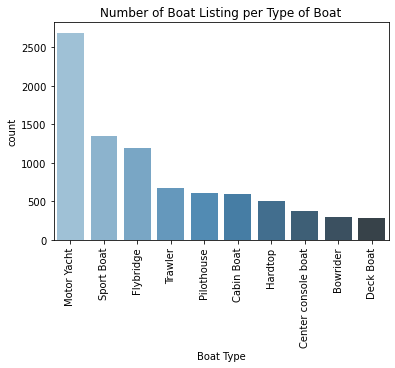

In [106]:
sns.countplot(data=df, x='Boat Type', palette='Blues_d',order = df['Boat Type'].value_counts()[:10].index)
plt.xticks(rotation =90)
plt.title('Number of Boat Listing per Type of Boat')
plt.show()

Although 3.6% of the data is removed, we leave 0 null values.
Each column has their own respective type of boat. 
We just disregard the combination of boat types.
So we only assume each model only has one type so that the analysis would be easier.
Counting each of the combination may disrupt the analysis because there is not enough data of the boat combination.

### 2.2.2 Missing Data

Most of the missing data is in Manufacturer, Material, and Year Built column.
Since we already clear manufacturer column, now we only need material and year built column to take care off.

#### 2.2.2.1 Year Column

In [107]:
df['Year Built'][df['Year Built'] == 0].count()

547

We have 551 column of missing data. 
Deleting it would be unwise since its already 5% of the data.
We can fill it by imputing mean value of the year.

In [108]:
df['Year Built'] = df['Year Built'].replace(0,np.nan)
df['Year Built'].fillna(df['Year Built'].mean(), inplace=True)
df['Year Built'] = df['Year Built'].astype(int)
df['Year Built'].isna().sum()

#We have successfully managed the missing value in Year Built column.

0

#### 2.2.2.2 Material Column

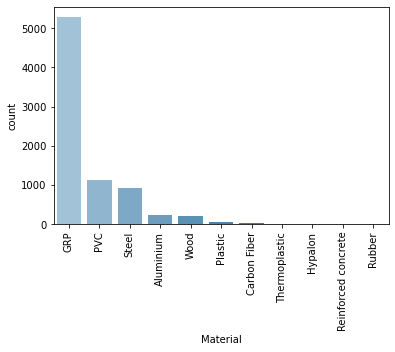

In [109]:
sns.countplot(data=df, x='Material',palette='Blues_d',order = df['Material'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Since most of the rows belongs to GRP material, most likely the missing values also belong to GRP.
We can impute and assume to replace missing value into GRP material.

In [110]:
df['Material'].fillna('GRP', inplace=True)
df['Material'].isna().sum()

#We have successfully imputed the missing values for material column

0

#### 2.2.2.3 Other Columns

In [111]:
df.isna().sum()

Unnamed: 0     0
Price          0
Boat Type      0
Type           6
Year Built     0
Length         9
Width         56
Material       0
Location       0
View           0
Fuel           0
dtype: int64

In [112]:
#Based on result above, there are 3 columns left that have missing value.
#Since the quantities are still acceptable, we can delete the rows containing missing value.

df = df.dropna(subset=['Type','Length','Width'])
df.isna().sum()

Unnamed: 0    0
Price         0
Boat Type     0
Type          0
Year Built    0
Length        0
Width         0
Material      0
Location      0
View          0
Fuel          0
dtype: int64

In [113]:
df.info()

#The missing value is only reducing 0.6% of the data. So its a good decision to delete the missing value.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9548 entries, 0 to 9609
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9548 non-null   int64  
 1   Price       9548 non-null   int32  
 2   Boat Type   9548 non-null   object 
 3   Type        9548 non-null   object 
 4   Year Built  9548 non-null   int32  
 5   Length      9548 non-null   float64
 6   Width       9548 non-null   float64
 7   Material    9548 non-null   object 
 8   Location    9548 non-null   object 
 9   View        9548 non-null   int64  
 10  Fuel        9548 non-null   object 
dtypes: float64(2), int32(2), int64(2), object(5)
memory usage: 820.5+ KB


## 2.3 Exploring Cleaned Data

After cleaning the data, we run through some additional exploratory data analysis.

In [114]:
#Since we got one new numerical column, Price, we should run correlation check one more time
df.corr()

,Unnamed: 0,Price,Year Built,Length,Width,View
Unnamed: 0,1.000000,-0.131369,-0.072461,-0.217772,-0.240351,0.093757
Price,-0.131369,1.000000,0.097785,0.566617,0.529727,-0.024232
Year Built,-0.072461,0.097785,1.000000,-0.214793,-0.117018,-0.100505
Length,-0.217772,0.566617,-0.214793,1.000000,0.873670,-0.155657
Width,-0.240351,0.529727,-0.117018,0.873670,1.000000,-0.190113
View,0.093757,-0.024232,-0.100505,-0.155657,-0.190113,1.000000


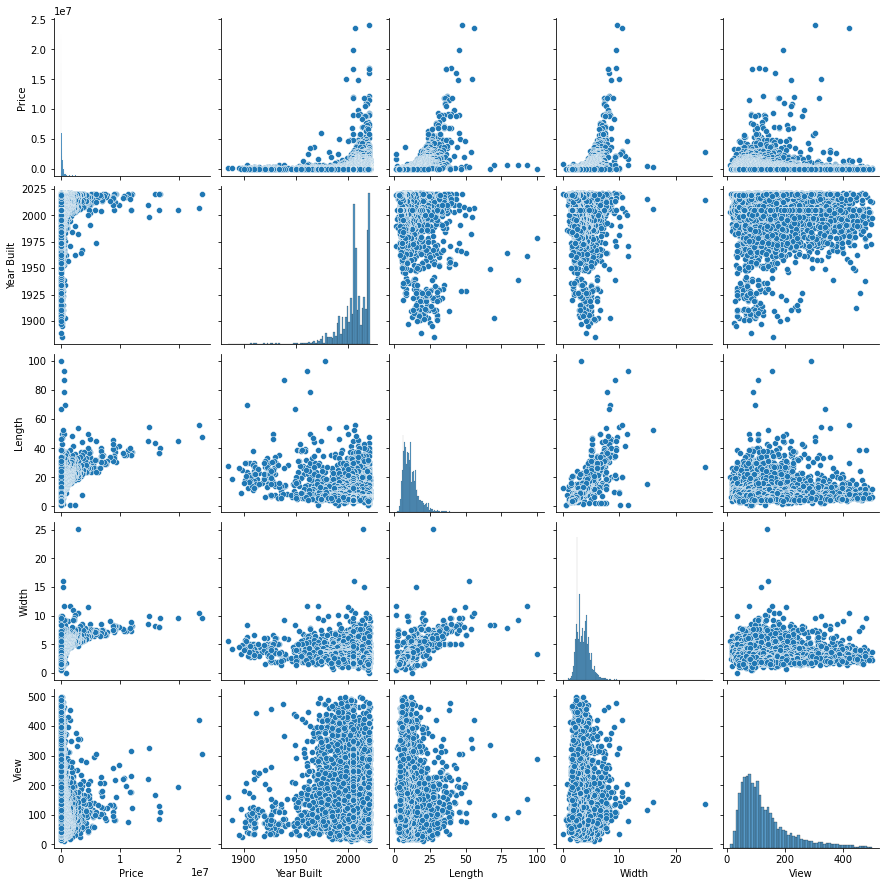

In [115]:
#Exploring numerical columns once again since the data now has been cleaned
sns.pairplot(df[['Price','Year Built','Length','Width','View']])
plt.show()

The numerical columns have no correlation to each other.
There is also no interesting patterns among numerical columns including the dependent variable.

# 3. Data Modelling

After the data is cleaned, we proceed with data modelling.
We will use several model to tests and choose the best model that can predict the number of views.
We will use feature importance analysis to choose which features are the most influencing and less influencing features.

## 3.1 Pre-Processing and Splitting Data

Since the nature of the data is labeled and the dependent variable is a random numerical column, 
we will use <b>supervised machine learning regression model </b>

### 3.1.1 Label Encoding

In [116]:
cat_col= df.select_dtypes("object").columns.to_list()
num_col = df.select_dtypes(['int64','float64']).columns.to_list()

#Label Encoding Categorical Columns
le = LabelEncoder()
df[cat_col] = df[cat_col].apply(lambda x: le.fit_transform(x))
print(df[cat_col].head())

   Boat Type  Type  Material  Location  Fuel
0         13     5         2        17     5
1          3     5         9         6     5
2         21     5         0        17     5
3         21     5         2         3     5
4          6     5         0         6     5


### 3.1.2 Splitting the Data

In [117]:
X = df.drop('View', axis=1)
y = df[['View']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.2 Random Forest Regressor

In [118]:
#Running this hyperparameter tuning.
#Skipped this for easier journey.

"""
parameters_rf = {
    'max_depth':[5, 10, 15, 20],
    'min_samples_split':[2, 5, 8, 10],
    'min_samples_leaf':[2, 5, 8, 10],
    'max_features':['auto', 'sqrt'],
    'bootstrap':[True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_estimators=1000),
    param_distributions=parameters_rf,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    verbose=1
)

random_search_rf.fit(X_train, y_train)

random_search_rf.best_score_
random_search_rf.best_params_
random_search_rf.best_estimator

"""

"\nparameters_rf = {\n    'max_depth':[5, 10, 15, 20],\n    'min_samples_split':[2, 5, 8, 10],\n    'min_samples_leaf':[2, 5, 8, 10],\n    'max_features':['auto', 'sqrt'],\n    'bootstrap':[True, False]\n}\n\nrandom_search_rf = RandomizedSearchCV(\n    estimator=RandomForestRegressor(random_state=42, n_estimators=1000),\n    param_distributions=parameters_rf,\n    n_iter=100,\n    scoring='neg_mean_squared_error',\n    cv=3,\n    random_state=42,\n    verbose=1\n)\n\nrandom_search_rf.fit(X_train, y_train)\n\nrandom_search_rf.best_score_\nrandom_search_rf.best_params_\nrandom_search_rf.best_estimator\n\n"

In [119]:
rf = RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=2
                           ,n_estimators=200, random_state=42) 

rf.fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)

In [120]:
#Creating base model assuming all mean value.
base = [y_test['View'].mean() for i in range(len(y_test))]

#Checking RMSE
mse_test = MSE(y_test, y_pred)
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_base = MSE(y_test,base)**(1/2)
r2_test = r2_score(y_test, y_pred)**(1/2)
r2_base = r2_score(y_test,base)**(1/2)

print(rmse_test, rmse_base, r2_test, r2_base)

67.1243860014229 86.88259803075957 0.6349086292767843 0.0


In [121]:
rmse_test / y_test['View'].mean()

0.5158117006808061

The random forest model is able to give approximately 51% off from predicted value. Pretty close with the goal.

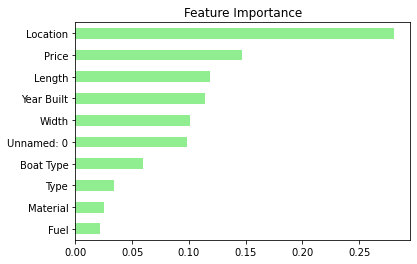

In [122]:
importances_rf = pd.Series(rf.feature_importances_, index= X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.title('Feature Importance')
plt.show()

The most important features are location and price while the least important features are type, material, and fuel.

## 3.3 XGBoosting

In [123]:
gbm = xgb.XGBRegressor()
gbm.fit(X_train, y_train.values.ravel())
y_pred_gbm = gbm.predict(X_test)

#Creating base model assuming all mean value.
base = [y_test['View'].mean() for i in range(len(y_test))]

#Checking RMSE
mse_test_gbm = MSE(y_test, y_pred_gbm)
rmse_test_gbm = MSE(y_test, y_pred_gbm)**(1/2)
rmse_base_gbm = MSE(y_test,base)**(1/2)
print(mse_test_gbm, rmse_test_gbm, rmse_base_gbm)

4614.271232939158 67.92842728150828 86.88259803075957


In [124]:
#The machine is not capable to do this hyperparameter tuning.

#param_grid = {'learning_rate_list' : [0.02, 0.05, 0.1],
#              'max_depth_list' : [2, 3, 5],
#              'subsample':[0.3,0.5,0.9]}
#
#gbm = xgb.XGBRegressor()
#
#random_search_xgb = RandomizedSearchCV(
#    estimator=gbm,
#    param_distributions=param_grid,
#    n_iter=75,
#    scoring='roc_auc',
#    cv=5,
#    random_state=42,
#    verbose=1)


## 3.4 Other Models

Quickly check the other model in default forms.

In [125]:
#Linear Regression
linear = LinearRegression()
linear.fit(X_train, y_train.values.ravel())
y_pred_linear = linear.predict(X_test)

#Checking RMSE
mse_test_linear = MSE(y_test, y_pred_linear)
rmse_test_linear = MSE(y_test, y_pred_linear)**(1/2)
rmse_base_linear = MSE(y_test,base)**(1/2)
print(mse_test_linear, rmse_test_linear, rmse_base_linear)

6456.117574863893 80.34996935197856 86.88259803075957


In [126]:
#SVM

svr = svm.SVR()
svr.fit(X_train, y_train.values.ravel())
y_pred_svr = svr.predict(X_test)

#Checking RMSE
mse_test_svr = MSE(y_test, y_pred_svr)
rmse_test_svr = MSE(y_test, y_pred_svr)**(1/2)
rmse_base_svr = MSE(y_test,base)**(1/2)
print(mse_test_svr, rmse_test_svr, rmse_base_svr)

7746.191964871194 88.01245346467279 86.88259803075957


In [127]:
#Decision Tree Regressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train.values.ravel())
y_pred_tree = tree.predict(X_test)

#Checking RMSE
mse_test_tree = MSE(y_test, y_pred_tree)
rmse_test_tree = MSE(y_test, y_pred_tree)**(1/2)
rmse_base_tree = MSE(y_test,base)**(1/2)
print(mse_test_tree, rmse_test_tree, rmse_base_tree)

8713.09057591623 93.3439370067292 86.88259803075957


In [128]:
#KNeighborsClassifier

knn = KNeighborsRegressor()
knn.fit(X_train, y_train.values.ravel())
y_pred_knn = knn.predict(X_test)

#Creating base model assuming all mean value.
base = [y_test['View'].mean() for i in range(len(y_test))]

#Checking RMSE
mse_test_knn = MSE(y_test, y_pred_knn)
rmse_test_knn = MSE(y_test, y_pred_knn)**(1/2)
rmse_base_knn = MSE(y_test,base)**(1/2)
print(mse_test_knn, rmse_test_knn, rmse_base_knn)

7219.876942408377 84.969859023117 86.88259803075957


# 4. Conclusion

- Based on the result in the modelling, we can conclude that the best model to be used is Random Forest Regressor with RMSE value of 66.4. The average prediction is approximately 50% off the average true number of views.

- The most important features are location and price while the least important features are type, material, and fuel.

- We can consider to remove features type, material, and fuel from the survey because the data availability of those features are not too important in the model prediction.



# 5. Future Consideration

- Check every single new boat to be listed
  * For every single new boat, now we can check first to the model before listing it in the website. We can choose not to list least demand boats.

- See in further detail for location
  * Since location is the most important variable, it may be worth it to see further in detail for location. Example is detailing the highest demand city.

- Future trend shifting
  * Demand to luxury may be influenced by external factors such as global economy. It is better to overlook such factors and update this model accordingly based on latest data.


# Thank you

Hopes you enjoy the publication!